# Predict whether income exceeds $50K/yr (based on census data)

## Group 42

### EG/2020/4113 Perera K.R.D.
### EG/2020/4225 Suraweera S.A.Y.A.

#### Import Libararies

In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

from sklearn.model_selection import GridSearchCV




## Load the Data set

In [93]:
data = pd.read_csv('adult.csv')
df = data.copy()

print(df.shape)
df.head(10)

(32561, 15)


,Age,WorkClass,fnlwgt,Education,EducationNum,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerweek,NativeCountry,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


## check the null values

In [94]:
# get the null values
df.isnull().sum()

Age                 0
WorkClass        1836
fnlwgt              0
Education           0
EducationNum        0
MaritalStatus       0
Occupation       1843
Relationship        0
Race                0
Sex                 0
CapitalGain         0
CapitalLoss         0
HoursPerweek        0
NativeCountry     583
Income              0
dtype: int64

<Axes: >

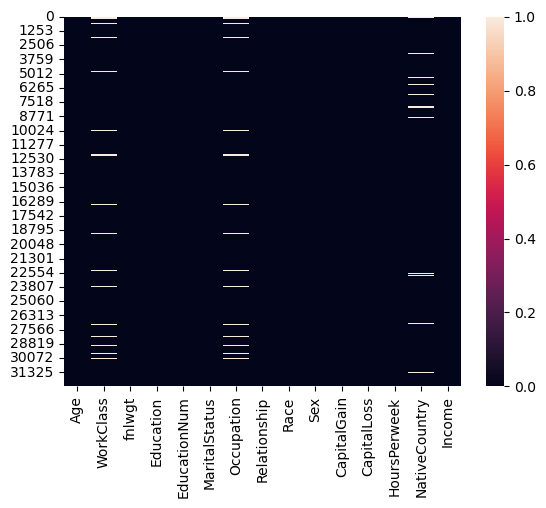

In [95]:
# Plot heat map of null values
sns.heatmap(data=df.isnull())

In [96]:
# Calculate null value percentages for each column
null_percentages = (df.isnull().mean() * 100).round(2)
null_percentages

Age              0.00
WorkClass        5.64
fnlwgt           0.00
Education        0.00
EducationNum     0.00
MaritalStatus    0.00
Occupation       5.66
Relationship     0.00
Race             0.00
Sex              0.00
CapitalGain      0.00
CapitalLoss      0.00
HoursPerweek     0.00
NativeCountry    1.79
Income           0.00
dtype: float64

### WorkClass

Text(0.5, 1.0, 'Barplot of Workclass Variable')

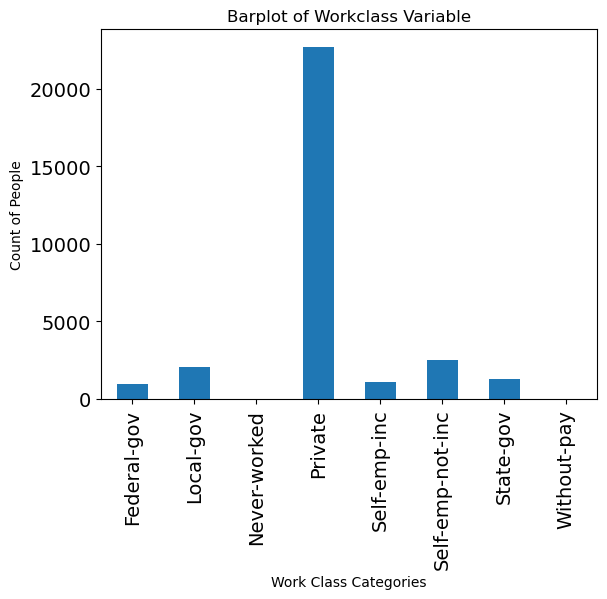

In [97]:
#Grouping Workclass

df.groupby(['WorkClass']).size().plot(kind="bar",fontsize=14)
plt.xlabel('Work Class Categories')
plt.ylabel('Count of People')
plt.title('Barplot of Workclass Variable')

Null value traetment of WorkClass

In [98]:
df['WorkClass'].fillna(df['WorkClass'].mode()[0], inplace=True)

### Native Country

Text(0.5, 1.0, 'Barplot of Native Country Variable')

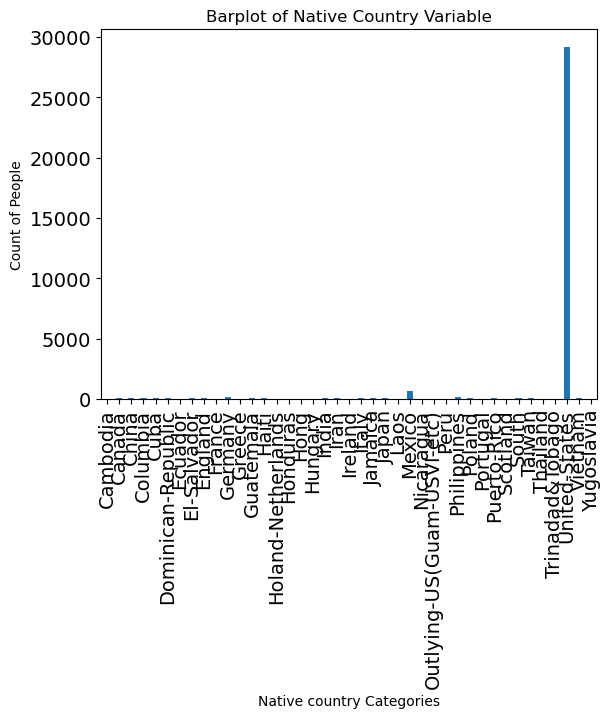

In [99]:
#Grouping Native Country

df.groupby(['NativeCountry']).size().plot(kind="bar",fontsize=14)
plt.xlabel('Native country Categories')
plt.ylabel('Count of People')
plt.title('Barplot of Native Country Variable')

Null value traetment of NativeCountry

In [100]:
df['NativeCountry'].fillna(df['NativeCountry'].mode()[0], inplace=True)

### Occupation

Text(0.5, 1.0, 'Barplot of occpation Variable')

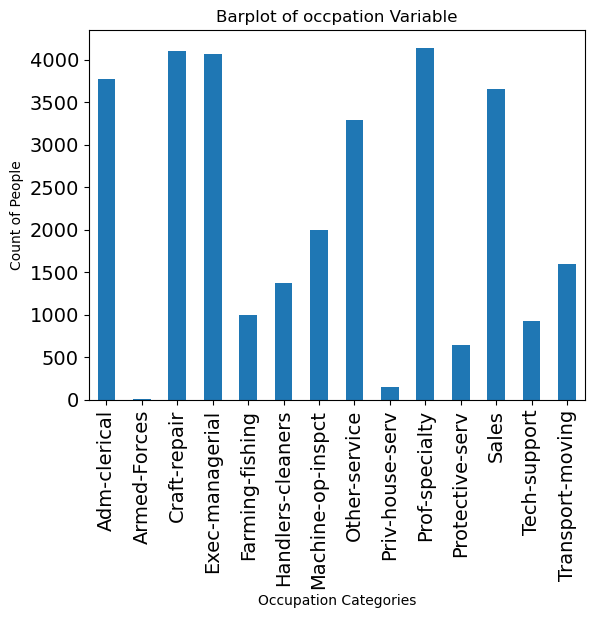

In [101]:
#Grouping Occpation

df.groupby(['Occupation']).size().plot(kind="bar",fontsize=14)
plt.xlabel('Occupation Categories')
plt.ylabel('Count of People')
plt.title('Barplot of occpation Variable')

Null value traetment of Occupation

In [102]:
df = df[pd.notnull(df["Occupation"])]

<Axes: >

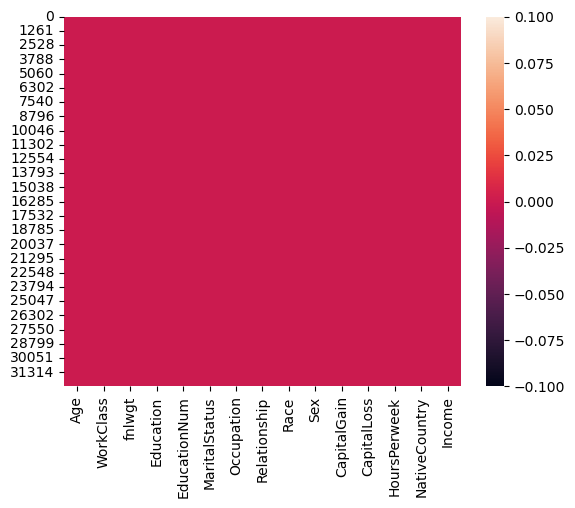

In [103]:
# plot heat map to check null values
sns.heatmap(data=df.isnull())

### Marital Status

Text(0.5, 1.0, 'Barplot of Marital Status Variable')

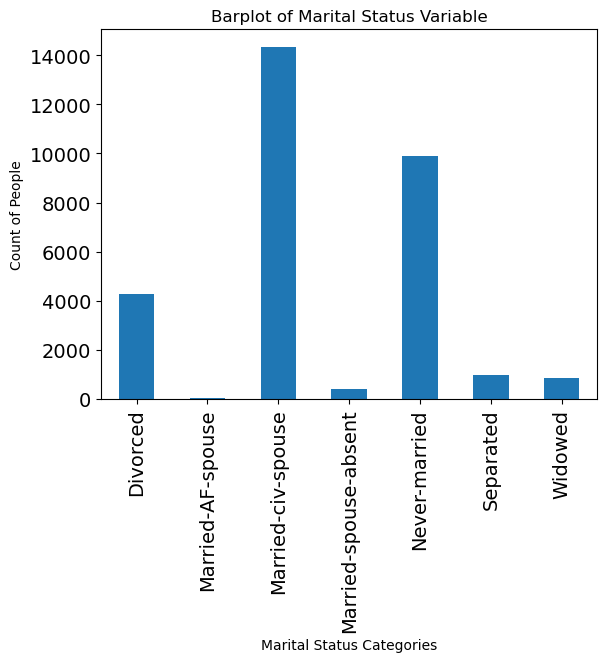

In [104]:
#Grouping Occpation

df.groupby(['MaritalStatus']).size().plot(kind="bar",fontsize=14)
plt.xlabel('Marital Status Categories')
plt.ylabel('Count of People')
plt.title('Barplot of Marital Status Variable')

### Relationship

Text(0.5, 1.0, 'Barplot of Relationship Variable')

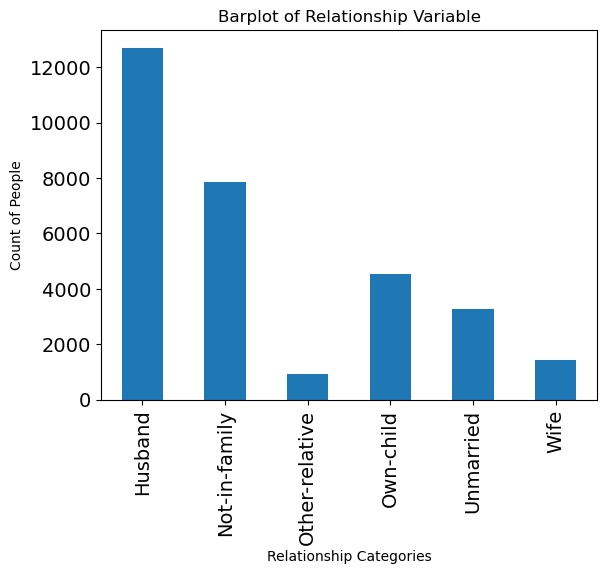

In [105]:
df.groupby(['Relationship']).size().plot(kind="bar",fontsize=14)
plt.xlabel('Relationship Categories')
plt.ylabel('Count of People')
plt.title('Barplot of Relationship Variable')

### Sex

Text(0.5, 1.0, 'Barplot of Sex Variable')

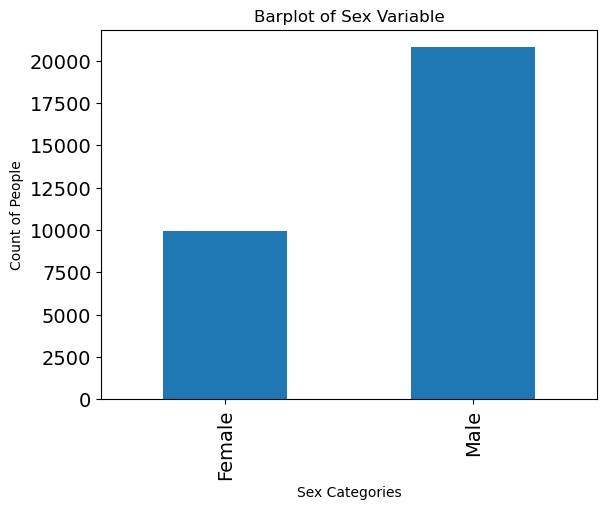

In [106]:
df.groupby(['Sex']).size().plot(kind="bar",fontsize=14)
plt.xlabel('Sex Categories')
plt.ylabel('Count of People')
plt.title('Barplot of Sex Variable')

### Education

Text(0.5, 1.0, 'Barplot of Education Variable')

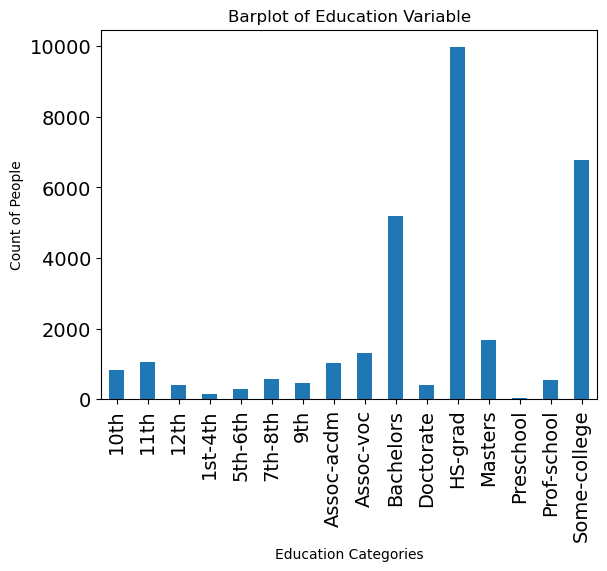

In [107]:
df.groupby(['Education']).size().plot(kind="bar",fontsize=14)
plt.xlabel('Education Categories')
plt.ylabel('Count of People')
plt.title('Barplot of Education Variable')

### Race

Text(0.5, 1.0, 'Barplot of Race Variable')

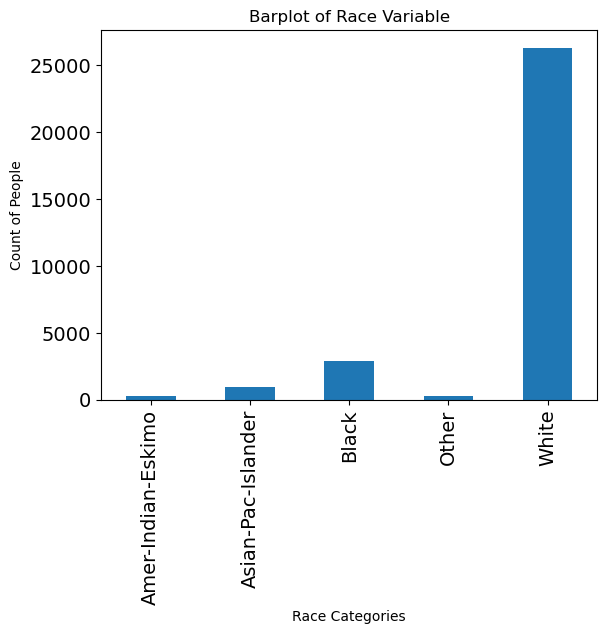

In [108]:
df.groupby(['Race']).size().plot(kind="bar",fontsize=14)
plt.xlabel('Race Categories')
plt.ylabel('Count of People')
plt.title('Barplot of Race Variable')

In [109]:
# get the null values
df.isnull().sum()

Age              0
WorkClass        0
fnlwgt           0
Education        0
EducationNum     0
MaritalStatus    0
Occupation       0
Relationship     0
Race             0
Sex              0
CapitalGain      0
CapitalLoss      0
HoursPerweek     0
NativeCountry    0
Income           0
dtype: int64

#### Check the duplicate data and clean

In [110]:
print("Number of duplicate data : ",df.duplicated().sum())

Number of duplicate data :  24


In [111]:
df = df.drop_duplicates()

## Inspect the dataset

In [112]:
df.head(10)

,Age,WorkClass,fnlwgt,Education,EducationNum,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerweek,NativeCountry,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [113]:
df.describe()

,Age,fnlwgt,EducationNum,CapitalGain,CapitalLoss,HoursPerweek
count,30694.000000,3.069400e+04,30694.000000,30694.000000,30694.000000,30694.000000
mean,38.447612,1.898482e+05,10.131557,1106.901903,88.979735,40.952759
std,13.115154,1.054651e+05,2.561280,7500.730406,405.808149,11.984367
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178285e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.785135e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.372938e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


#### Data unique Values

In [114]:
df.nunique()

Age                 72
WorkClass            7
fnlwgt           20495
Education           16
EducationNum        16
MaritalStatus        7
Occupation          14
Relationship         6
Race                 5
Sex                  2
CapitalGain        118
CapitalLoss         90
HoursPerweek        94
NativeCountry       41
Income               2
dtype: int64

EducationNum and Education are the columns that representing the same data as text and as a scale
So, there is duplicate columns and EducationNum column is removed

In [115]:
df = df.drop(columns=['EducationNum'])

## Inspect WorkClass feature

In [116]:
df["WorkClass"].value_counts()

WorkClass
Private             22673
Self-emp-not-inc     2540
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Name: count, dtype: int64

In [117]:
# List of unique values in the 'WorkClass' column
workclass_values = ['Private', 'Self-emp-not-inc', 'Local-gov', 'State-gov', 'Self-emp-inc', 'Federal-gov', 'Without-pay']

percentage_dict = {}

# Calculate percentage for each unique value
for workclass in workclass_values:
    filtered_df = df[(df['WorkClass'] == workclass) & (df['Income'] == '>50K')]
    num_rows = len(filtered_df)
    
    # Get the total number of rows where WorkClass is the current value
    total_rows_current = len(df[df['WorkClass'] == workclass])
    
    # Calculate the percentage and store it in the dictionary
    percentage = (num_rows / total_rows_current) * 100 if total_rows_current > 0 else 0
    percentage_dict[workclass] = percentage

# Print the percentage for each unique value
for workclass, percentage in percentage_dict.items():
    print(f"{workclass}: {percentage:.2f}%")



Private: 21.88%
Self-emp-not-inc: 28.50%
Local-gov: 29.48%
State-gov: 27.20%
Self-emp-inc: 55.73%
Federal-gov: 38.65%
Without-pay: 0.00%


#### Reduce unique values by considering the percentages

In [118]:
# Replace specific values in the 'WorkClass' column with a new label
df['WorkClass'].replace(['Self-emp-not-inc', 'Local-gov', 'State-gov'], 'Public Sector', inplace=True)

# Display the counts for each value in the 'WorkClass' column
print(df['WorkClass'].value_counts())


WorkClass
Private          22673
Public Sector     5931
Self-emp-inc      1116
Federal-gov        960
Without-pay         14
Name: count, dtype: int64


## Inspect Education feature

In [119]:
df["Education"].value_counts()

Education
HS-grad         9961
Some-college    6766
Bachelors       5180
Masters         1674
Assoc-voc       1321
11th            1056
Assoc-acdm      1020
10th             831
7th-8th          572
Prof-school      558
9th              463
Doctorate        398
12th             393
5th-6th          302
1st-4th          154
Preschool         45
Name: count, dtype: int64

In [120]:
# List of unique values in the 'Education' column
education_values = ['HS-grad', 'Some-college', 'Bachelors', 'Masters', 'Assoc-voc', '11th', 
                    'Assoc-acdm', '10th', '7th-8th', 'Prof-school', '9th', '12th', 'Doctorate', 
                    '5th-6th', '1st-4th', 'Preschool']

percentage_dict_education = {}

# Calculate percentage for each unique value in the 'Education' column
for education_level in education_values:
    filtered_df = df[(df['Education'] == education_level) & (df['Income'] == '>50K')]
    num_rows = len(filtered_df)
    
    # Get the total number of rows where Education is the current value
    total_rows_current = len(df[df['Education'] == education_level])
    
    # Calculate the percentage and store it in the dictionary
    percentage = (num_rows / total_rows_current) * 100 if total_rows_current > 0 else 0
    percentage_dict_education[education_level] = percentage

# Print the percentage for each unique value in the 'Education' column
for education_level, percentage in percentage_dict_education.items():
    print(f"{education_level}: {percentage:.2f}%")


HS-grad: 16.34%
Some-college: 19.97%
Bachelors: 42.01%
Masters: 56.21%
Assoc-voc: 26.34%
11th: 5.68%
Assoc-acdm: 25.39%
10th: 7.22%
7th-8th: 6.64%
Prof-school: 74.37%
9th: 5.62%
12th: 7.89%
Doctorate: 74.12%
5th-6th: 4.64%
1st-4th: 3.90%
Preschool: 0.00%


#### Reduce unique values by considering the percentages

In [121]:
# Replace specific values in the 'Education' column with a new label
df['Education'].replace(['HS-grad', 'Some-college'], 'High School Grad', inplace=True)
df['Education'].replace(['Assoc-voc', 'Assoc-acdm'], 'Associate Degree', inplace=True)
df['Education'].replace(['9th', '12th','11th','10th','7th-8th','5th-6th','1st-4th'], 'Below HS Grad', inplace=True)
df['Education'].replace(['Prof-school', 'Doctorate'], 'Advanced Degree', inplace=True)

# Display the counts for each value in the 'Education' column
print(df['Education'].value_counts())

Education
High School Grad    16727
Bachelors            5180
Below HS Grad        3771
Associate Degree     2341
Masters              1674
Advanced Degree       956
Preschool              45
Name: count, dtype: int64


## Inspect MaritalStatus feature

In [122]:
df["MaritalStatus"].value_counts()

MaritalStatus
Married-civ-spouse       14333
Never-married             9896
Divorced                  4256
Separated                  959
Widowed                    840
Married-spouse-absent      389
Married-AF-spouse           21
Name: count, dtype: int64

In [123]:
# List of unique values in the 'MaritalStatus' column
marital_status_values = ['Married-civ-spouse', 'Never-married', 'Divorced', 'Separated', 'Widowed', 'Married-spouse-absent', 'Married-AF-spouse']

percentage_dict_marital_status = {}

# Calculate percentage for each unique value in the 'MaritalStatus' column
for marital_status in marital_status_values:
    filtered_df = df[(df['MaritalStatus'] == marital_status) & (df['Income'] == '>50K')]
    num_rows = len(filtered_df)
    
    # Get the total number of rows where MaritalStatus is the current value
    total_rows_current = len(df[df['MaritalStatus'] == marital_status])
    
    # Calculate the percentage and store it in the dictionary
    percentage = (num_rows / total_rows_current) * 100 if total_rows_current > 0 else 0
    percentage_dict_marital_status[marital_status] = percentage

# Print the percentage for each unique value in the 'MaritalStatus' column
for marital_status, percentage in percentage_dict_marital_status.items():
    print(f"{marital_status}: {percentage:.2f}%")


Married-civ-spouse: 45.48%
Never-married: 4.87%
Divorced: 10.74%
Separated: 6.88%
Widowed: 9.64%
Married-spouse-absent: 8.48%
Married-AF-spouse: 47.62%


#### Reduce unique values by considering the percentages

In [124]:
# Replace specific values in the 'MaritalStatus' column with a new label
df['MaritalStatus'].replace(['Married-civ-spouse', 'Married-AF-spouse'], 'Married', inplace=True)
df['MaritalStatus'].replace(['Divorced', 'Separated','Widowed','Married-spouse-absent'], 'Separated/Widowed/Divorced', inplace=True)

# Display the counts for each value in the 'MaritalStatus' column
print(df['MaritalStatus'].value_counts())

MaritalStatus
Married                       14354
Never-married                  9896
Separated/Widowed/Divorced     6444
Name: count, dtype: int64


## Inspect Occupation feature

In [125]:
df["Occupation"].value_counts()

Occupation
Prof-specialty       4136
Craft-repair         4094
Exec-managerial      4065
Adm-clerical         3768
Sales                3650
Other-service        3291
Machine-op-inspct    2000
Transport-moving     1597
Handlers-cleaners    1369
Farming-fishing       992
Tech-support          927
Protective-serv       649
Priv-house-serv       147
Armed-Forces            9
Name: count, dtype: int64

In [126]:
# List of unique values in the 'Occupation' column
occupation_values = ['Prof-specialty', 'Craft-repair', 'Exec-managerial', 'Adm-clerical', 'Sales', 
                      'Other-service', 'Machine-op-inspct', 'Transport-moving', 'Handlers-cleaners', 
                      'Farming-fishing', 'Tech-support', 'Protective-serv', 'Priv-house-serv', 'Armed-Forces']

percentage_dict_occupation = {}

# Calculate percentage for each unique value in the 'Occupation' column
for occupation in occupation_values:
    filtered_df = df[(df['Occupation'] == occupation) & (df['Income'] == '>50K')]
    num_rows = len(filtered_df)
    
    # Get the total number of rows where Occupation is the current value
    total_rows_current = len(df[df['Occupation'] == occupation])
    
    # Calculate the percentage and store it in the dictionary
    percentage = (num_rows / total_rows_current) * 100 if total_rows_current > 0 else 0
    percentage_dict_occupation[occupation] = percentage

# Print the percentage for each unique value in the 'Occupation' column
for occupation, percentage in percentage_dict_occupation.items():
    print(f"{occupation}: {percentage:.2f}%")


Prof-specialty: 44.92%
Craft-repair: 22.69%
Exec-managerial: 48.41%
Adm-clerical: 13.46%
Sales: 26.93%
Other-service: 4.16%
Machine-op-inspct: 12.45%
Transport-moving: 20.04%
Handlers-cleaners: 6.28%
Farming-fishing: 11.59%
Tech-support: 30.53%
Protective-serv: 32.51%
Priv-house-serv: 0.68%
Armed-Forces: 11.11%


#### Reduce unique values by considering the percentages

In [127]:
# Replace specific values in the 'Occupation' column with new labels
df['Occupation'].replace(['Prof-specialty', 'Exec-managerial'], 'Professional Managerial', inplace=True)
df['Occupation'].replace(['Craft-repair', 'Transport-moving'], 'Skilled Trades', inplace=True)
df['Occupation'].replace(['Adm-clerical', 'Machine-op-inspct', 'Farming-fishing', 'Armed-Forces'], 'Admin Clerical', inplace=True)
df['Occupation'].replace(['Sales', 'Protective-serv', 'Tech-support'], 'Sales Protective Services Tech-Support', inplace=True)
df['Occupation'].replace(['Other-service', 'Handlers-cleaners'], 'Other Services Handlers Cleaners', inplace=True)

# Display the counts for each value in the 'Occupation' column
print(df['Occupation'].value_counts())


Occupation
Professional Managerial                   8201
Admin Clerical                            6769
Skilled Trades                            5691
Sales Protective Services Tech-Support    5226
Other Services Handlers Cleaners          4660
Priv-house-serv                            147
Name: count, dtype: int64


## Inspect Race feature

In [128]:
# Race value counts
df["Race"].value_counts()

Race
White                 26280
Black                  2907
Asian-Pac-Islander      973
Amer-Indian-Eskimo      286
Other                   248
Name: count, dtype: int64

In [129]:
# List of unique values in the 'Race' column
race_values = ['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other']

percentage_dict_race = {}

# Calculate percentage for each unique value in the 'Race' column
for race in race_values:
    filtered_df = df[(df['Race'] == race) & (df['Income'] == '>50K')]
    num_rows = len(filtered_df)
    
    # Get the total number of rows where Race is the current value
    total_rows_current = len(df[df['Race'] == race])
    
    # Calculate the percentage and store it in the dictionary
    percentage = (num_rows / total_rows_current) * 100 if total_rows_current > 0 else 0
    percentage_dict_race[race] = percentage

# Print the percentage for each unique value in the 'Race' column
for race, percentage in percentage_dict_race.items():
    print(f"{race}: {percentage:.2f}%")


White: 26.42%
Black: 13.00%
Asian-Pac-Islander: 27.85%
Amer-Indian-Eskimo: 11.89%
Other: 9.27%


#### Reduce unique values by considering the percentages

In [130]:
# Replace specific values in the 'Race' column with new labels
df['Race'].replace(['White', 'Asian-Pac-Islander'], 'White Asian Pac Islander', inplace=True)
df['Race'].replace(['Black', 'Amer-Indian-Eskimo', 'Other'], 'Black Amer Indian Eskimo Other', inplace=True)

# Display the counts for each value in the 'Race' column
print(df['Race'].value_counts())


Race
White Asian Pac Islander          27253
Black Amer Indian Eskimo Other     3441
Name: count, dtype: int64


## Inspect Sex feature

In [131]:
# Sex value counts
df["Sex"].value_counts()

Sex
Male      20773
Female     9921
Name: count, dtype: int64

In [132]:
# List of unique values in the 'Sex' column
sex_values = ['Male', 'Female']

percentage_dict_sex = {}

# Calculate percentage for each unique value in the 'Sex' column
for sex in sex_values:
    filtered_df = df[(df['Sex'] == sex) & (df['Income'] == '>50K')]
    num_rows = len(filtered_df)
    
    # Get the total number of rows where Sex is the current value
    total_rows_current = len(df[df['Sex'] == sex])
    
    # Calculate the percentage and store it in the dictionary
    percentage = (num_rows / total_rows_current) * 100 if total_rows_current > 0 else 0
    percentage_dict_sex[sex] = percentage

# Print the percentage for each unique value in the 'Sex' column
for sex, percentage in percentage_dict_sex.items():
    print(f"{sex}: {percentage:.2f}%")


Male: 31.39%
Female: 11.36%


## Inspect Relationship feature

In [133]:
df["Relationship"].value_counts()

Relationship
Husband           12698
Not-in-family      7852
Own-child          4521
Unmarried          3270
Wife               1435
Other-relative      918
Name: count, dtype: int64

In [134]:
# List of unique values in the 'Relationship' column
relationship_values = ['Husband', 'Not-in-family', 'Own-child', 'Unmarried', 'Wife', 'Other-relative']

percentage_dict_relationship = {}

# Calculate percentage for each unique value in the 'Relationship' column
for relationship in relationship_values:
    filtered_df = df[(df['Relationship'] == relationship) & (df['Income'] == '>50K')]
    num_rows = len(filtered_df)
    
    # Get the total number of rows where Relationship is the current value
    total_rows_current = len(df[df['Relationship'] == relationship])
    
    # Calculate the percentage and store it in the dictionary
    percentage = (num_rows / total_rows_current) * 100 if total_rows_current > 0 else 0
    percentage_dict_relationship[relationship] = percentage

# Print the percentage for each unique value in the 'Relationship' column
for relationship, percentage in percentage_dict_relationship.items():
    print(f"{relationship}: {percentage:.2f}%")


Husband: 45.57%
Not-in-family: 10.67%
Own-child: 1.46%
Unmarried: 6.61%
Wife: 49.13%
Other-relative: 3.92%


#### Reduce unique values by considering the percentages

In [135]:
# Replace specific values in the 'Relationship' column with new labels
df['Relationship'].replace(['Husband', 'Wife'], 'Spouse', inplace=True)
df['Relationship'].replace(['Not-in-family', 'Unmarried'], 'Non-family Unmarried', inplace=True)
df['Relationship'].replace(['Own-child', 'Other-relative'], 'Own-child Other-relative', inplace=True)

# Display the counts for each value in the 'Relationship' column
print(df['Relationship'].value_counts())


Relationship
Spouse                      14133
Non-family Unmarried        11122
Own-child Other-relative     5439
Name: count, dtype: int64


## Inspect CapitalLoss feature

In [136]:
(df['CapitalLoss'] == 0).sum()

29233

In [137]:
# Get the total number of rows where Sex is 'Female'
total_rows_loss = len(df[df['CapitalLoss'] == 0])
print(total_rows_loss)

filtered_df = df[(df['CapitalLoss'] == 0) & (df['Income'] == '>50K')]

num_rows = len(filtered_df)
print(num_rows)

print ("percentage = " , ((num_rows/total_rows_loss)*100))

29233
6891
percentage =  23.572674716929498


## Inspect CapitalGain feature

In [138]:
(df['CapitalGain'] == 0).sum()

28105

In [139]:
# Get the total number of rows where Sex is 'Female'
total_rows_loss = len(df[df['CapitalGain'] == 0])
print(total_rows_loss)

filtered_df = df[(df['CapitalGain'] == 0) & (df['Income'] == '>50K')]

num_rows = len(filtered_df)
print(num_rows)
print ("percentage = " , ((num_rows/total_rows_loss)*100))

28105
6018
percentage =  21.41256004269703


## Inspect NativeCountry feature

In [140]:
df["NativeCountry"].value_counts()

NativeCountry
United-States                 28042
Mexico                          606
Philippines                     188
Germany                         128
Puerto-Rico                     109
Canada                          107
India                           100
El-Salvador                     100
Cuba                             92
England                          86
Jamaica                          80
South                            71
China                            68
Italy                            68
Dominican-Republic               67
Vietnam                          64
Guatemala                        61
Japan                            59
Poland                           56
Columbia                         56
Iran                             42
Taiwan                           42
Haiti                            42
Portugal                         34
Nicaragua                        33
Peru                             30
Greece                           29
France        

In [141]:

# Set 'United-States' as it is and all other values as 'Non-USA'
df['NativeCountry'] = np.where(df['NativeCountry'] == 'United-States', 'United-States', 'Non-USA')

# Display the counts for each value in the 'NativeCountry' column
print(df['NativeCountry'].value_counts())


NativeCountry
United-States    28042
Non-USA           2652
Name: count, dtype: int64


In [142]:
# Get unique values in the 'NativeCountry' column
unique_native_countries = df['NativeCountry'].unique()

percentage_dict_native_country = {}

# Calculate percentage for each unique value in the 'NativeCountry' column
for native_country in unique_native_countries:
    filtered_df = df[(df['NativeCountry'] == native_country) & (df['Income'] == '>50K')]
    num_rows = len(filtered_df)
    
    # Get the total number of rows where NativeCountry is the current value
    total_rows_current = len(df[df['NativeCountry'] == native_country])
    
    # Calculate the percentage and store it in the dictionary
    percentage = (num_rows / total_rows_current) * 100 if total_rows_current > 0 else 0
    percentage_dict_native_country[native_country] = percentage

# Print the percentage for each unique value in the 'NativeCountry' column
for native_country, percentage in percentage_dict_native_country.items():
    print(f"{native_country}: {percentage:.2f}%")



United-States: 25.44%
Non-USA: 19.34%


# Work with numerical data

## plot box plots

<Axes: >

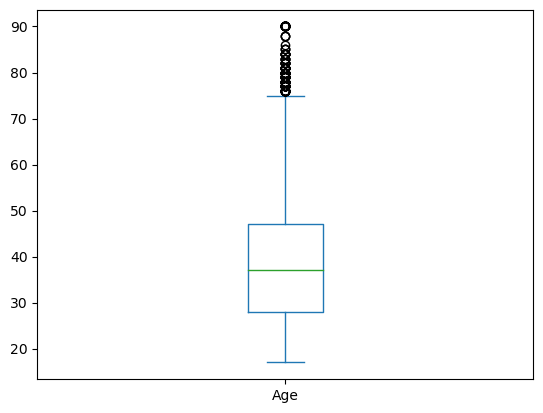

In [143]:
# box plots of Age
df["Age"].plot.box()

In [144]:

# Calculate the IQR (Interquartile Range) for the 'Age' column
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
print("IQR",IQR)

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]

# Display the range of non-outlier values
print(f"Non-outlier range for Age: ({lower_bound}, {upper_bound})")

outliers_count = len(outliers)
print(f"Number of outliers: {outliers_count}")



IQR 19.0
Non-outlier range for Age: (-0.5, 75.5)
Number of outliers: 171


<Axes: >

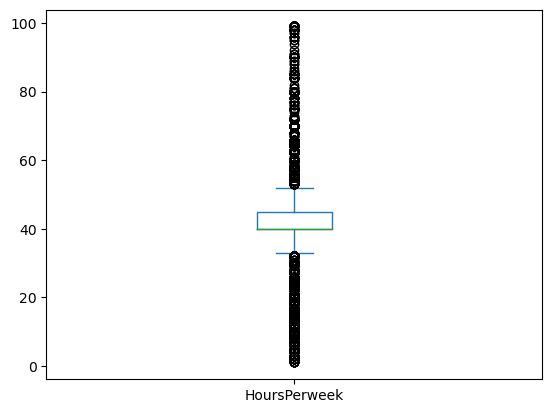

In [145]:
# box plots of HoursPerWeek
df["HoursPerweek"].plot.box()

In [146]:
# Calculate the IQR (Interquartile Range) for the 'Age' column
Q1 = df['HoursPerweek'].quantile(0.25)
Q3 = df['HoursPerweek'].quantile(0.75)
IQR = Q3 - Q1
print("IQR",IQR)

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['HoursPerweek'] < lower_bound) | (df['HoursPerweek'] > upper_bound)]

# Display the range of non-outlier values
print(f"Non-outlier range for HoursPerweek: ({lower_bound}, {upper_bound})")

outliers_count = len(outliers)
print(f"Number of outliers: {outliers_count}")

# #capping - change the outlier values to lower or upper limit values
df.loc[(df['HoursPerweek']>upper_bound), 'HoursPerweek'] = upper_bound
df.loc[(df['HoursPerweek']<lower_bound), 'HoursPerweek'] = lower_bound

IQR 5.0
Non-outlier range for HoursPerweek: (32.5, 52.5)
Number of outliers: 8096


<Axes: >

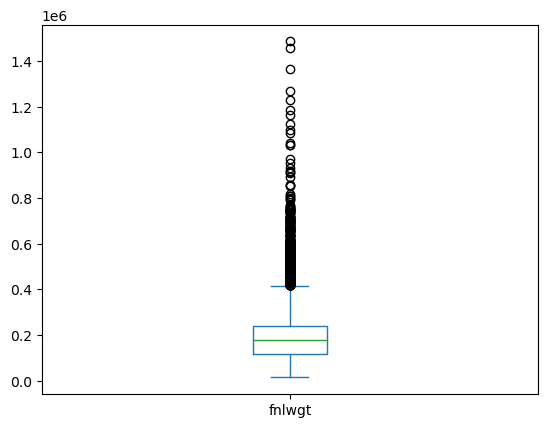

In [147]:
# box plots of fnlwgt
df["fnlwgt"].plot.box()

In [148]:

# Calculate the IQR (Interquartile Range) for the 'fnlwgt' column
Q1 = df['fnlwgt'].quantile(0.25)
Q3 = df['fnlwgt'].quantile(0.75)
IQR = Q3 - Q1
print("IQR",IQR)

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['fnlwgt'] < lower_bound) | (df['fnlwgt'] > upper_bound)]

# Display the range of non-outlier values
print(f"Non-outlier range for fnlwgt: ({lower_bound}, {upper_bound})")

outliers_count = len(outliers)
print(f"Number of outliers: {outliers_count}")

# #capping - change the outlier values to lower or upper limit values
df.loc[(df['fnlwgt']>upper_bound), 'fnlwgt'] = upper_bound
df.loc[(df['fnlwgt']<lower_bound), 'fnlwgt'] = lower_bound

IQR 119465.25
Non-outlier range for fnlwgt: (-61369.375, 416491.625)
Number of outliers: 926


In [149]:
df.head(1)

,Age,WorkClass,fnlwgt,Education,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerweek,NativeCountry,Income
0,39,Public Sector,77516.0,Bachelors,Never-married,Admin Clerical,Non-family Unmarried,White Asian Pac Islander,Male,2174,0,40.0,United-States,<=50K


## Convert all the non-numerical values using one-hot encoder 

In [150]:
##Label encoding the all the categorical features

df_lable = df.copy()

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_list=['Education','Income','WorkClass','MaritalStatus','Occupation','Relationship','Race','Sex','NativeCountry']
df_lable[cat_list]=df_lable[cat_list].apply(lambda x:le.fit_transform(x))

### Check Corelation Between data

<Axes: >

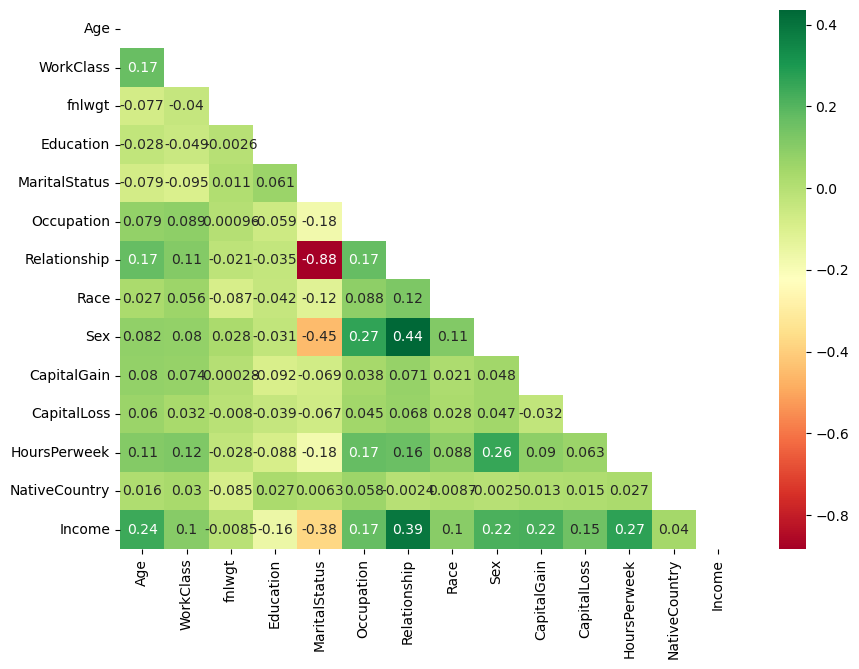

In [151]:
#Finding Correlation between variables
corr = df_lable.corr()
mask = np.zeros(corr.shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True
plt.subplots(figsize=(10,7))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,annot=True,cmap='RdYlGn',mask = mask)

In [152]:
wcl = pd.get_dummies(df['WorkClass'],drop_first=True)

edu = pd.get_dummies(df['Education'],drop_first=True)

mst = pd.get_dummies(df['MaritalStatus'],drop_first=True)

ocp = pd.get_dummies(df['Occupation'],drop_first=True)

rlt = pd.get_dummies(df['Relationship'],drop_first=True)

sex = pd.get_dummies(df['Sex'],drop_first=True)

rce = pd.get_dummies(df['Race'],drop_first=True)

ntc = pd.get_dummies(df['NativeCountry'],drop_first=True)

# Set ">50K" to 1 and "<=50K" to 0 in the 'Income' column
df['Income'] = df['Income'].replace({'>50K': 1, '<=50K': 0})

# concat all the data frames
df_final = pd.concat([wcl, edu, mst, ocp, rlt, sex, rce, ntc, df['Age'], df['fnlwgt'], df['CapitalGain'], df['CapitalLoss'], df['HoursPerweek'], df['Income']], axis=1)

print(df_final.shape)
df_final.head()

(30694, 28)


,Private,Public Sector,Self-emp-inc,Without-pay,Associate Degree,Bachelors,Below HS Grad,High School Grad,Masters,Preschool,...,Spouse,Male,White Asian Pac Islander,United-States,Age,fnlwgt,CapitalGain,CapitalLoss,HoursPerweek,Income
0,False,True,False,False,False,True,False,False,False,False,...,False,True,True,True,39,77516.0,2174,0,40.0,0
1,False,True,False,False,False,True,False,False,False,False,...,True,True,True,True,50,83311.0,0,0,32.5,0
2,True,False,False,False,False,False,False,True,False,False,...,False,True,True,True,38,215646.0,0,0,40.0,0
3,True,False,False,False,False,False,True,False,False,False,...,True,True,False,True,53,234721.0,0,0,40.0,0
4,True,False,False,False,False,True,False,False,False,False,...,True,False,False,False,28,338409.0,0,0,40.0,0


In [153]:
# get the null values
print(df_final.shape)
df_final.isnull().sum()

(30694, 28)


Private                                   0
Public Sector                             0
Self-emp-inc                              0
Without-pay                               0
Associate Degree                          0
Bachelors                                 0
Below HS Grad                             0
High School Grad                          0
Masters                                   0
Preschool                                 0
Never-married                             0
Separated/Widowed/Divorced                0
Other Services Handlers Cleaners          0
Priv-house-serv                           0
Professional Managerial                   0
Sales Protective Services Tech-Support    0
Skilled Trades                            0
Own-child Other-relative                  0
Spouse                                    0
Male                                      0
White Asian Pac Islander                  0
United-States                             0
Age                             

### PCA Algorithm

In [154]:
pca = PCA(0.95)
df_pca = pca.fit_transform(df_final)

### Split the Data Set

In [155]:
#Slicing dataset into Independent(X) and Target(y) varibles
y = df_final.pop('Income')
X = df_final

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=4)

### Scaling The DataSet

In [156]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.fit_transform(x_test)

# Check the accuracy

### Decision Tree 

In [157]:
dtree_model = DecisionTreeClassifier(random_state=4)
dtree_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=4)

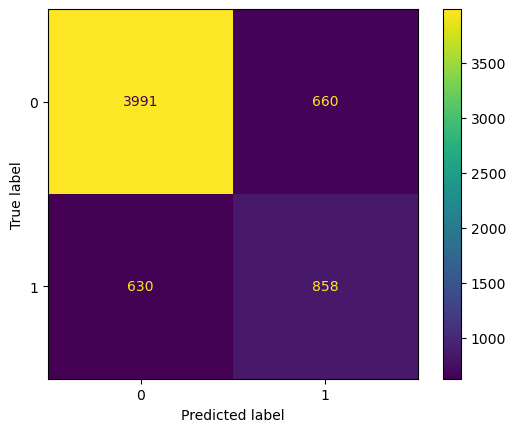

In [158]:
ConfusionMatrixDisplay.from_estimator(
    dtree_model, X_test_scaled, y_test,
    display_labels=["0", "1"])
plt.show()

In [159]:
y_pred_dtree = dtree_model.predict(X_test_scaled)

In [160]:
accuracy_score(y_test, y_pred_dtree)

0.7898680566867567

### SVM

In [161]:
svm_model = SVC(random_state=4)
svm_model.fit(X_train_scaled, y_train)

SVC(random_state=4)

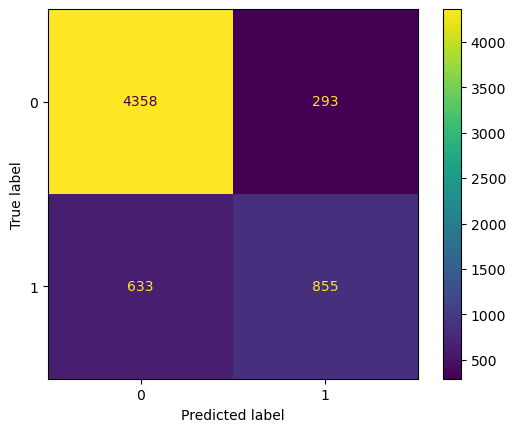

In [162]:
ConfusionMatrixDisplay.from_estimator(
    svm_model, X_test_scaled, y_test,
    display_labels=["0", "1"])
plt.show()

In [163]:
y_pred_svm = svm_model.predict(X_test_scaled)

In [164]:
accuracy_score(y_test, y_pred_svm)

0.8491611011565402

# Grid Search

## for SVM

In [165]:
svm_classifier = SVC(random_state=0)

In [166]:
param_grid = [{'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto'], 'C': [0.1, 1]}]

grid_search_svm = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=5)

In [167]:
grid_search_svm.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=0),
             param_grid=[{'C': [0.1, 1], 'gamma': ['scale', 'auto'],
                          'kernel': ['linear', 'rbf']}])

In [168]:
# Print best hyperparameters detected from the Grid Search
print("Best Hyperparameters:", grid_search_svm.best_params_)

Best Hyperparameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


In [169]:
# Print the mean cross-validated score of the best_estimator
print("Mean Cross-validated Score of the Best Estimator:", grid_search_svm.best_score_)

Mean Cross-validated Score of the Best Estimator: 0.845367542252087


In [170]:
# Use best estimator to obtain the accuracy for the test set
test_accuracy = grid_search_svm.best_estimator_.score(X_test_scaled, y_test)

# Print the accuracy on the test set
print("Test Set Accuracy:", test_accuracy)

Test Set Accuracy: 0.8491611011565402


In [171]:
y_pred_grid_svm = grid_search_svm.predict(X_test_scaled)

In [172]:
from sklearn.metrics import classification_report


print(classification_report(y_test, y_pred_grid_svm))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      4651
           1       0.74      0.57      0.65      1488

    accuracy                           0.85      6139
   macro avg       0.81      0.76      0.78      6139
weighted avg       0.84      0.85      0.84      6139



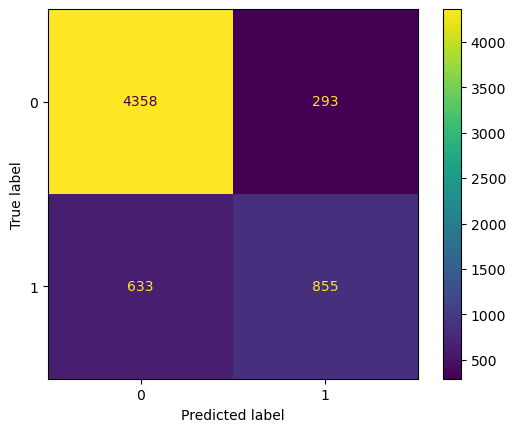

In [173]:
ConfusionMatrixDisplay.from_estimator(
    svm_model, X_test_scaled, y_test,
    display_labels=["0", "1"])
plt.show()

## for Decision Tree

In [174]:
dtree_classifier = DecisionTreeClassifier(splitter='random', random_state=0)

In [175]:
param_grid = {
    'max_depth': [None, 5, 15, 20, 25, 30],             # Maximum depth of the trees
    'min_samples_split': [2, 3, 5, 7, 10, 15],             # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4, 6, 8, 10],
    'max_features': ['auto', 'log2'],
    'criterion': ['gini']   
}

grid_search = GridSearchCV(estimator=dtree_classifier,param_grid=param_grid, verbose=2, cv=5)

In [176]:
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
[CV] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=3; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=3; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_spli

d:\Anaconda App\Lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
1080 fits failed out of a total of 2160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1080 fits failed with the following error:
Traceback (most recent call last):
  File "d:\Anaconda App\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\Anaconda App\Lib\site-packages\sklearn\base.py", line 1344, in wrapper
    estimator._validate_params()
  File "d:\Anaconda App\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "d:\Anaconda App\Lib\site-packages\sklearn\utils\_param_validation.py", li

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(random_state=0,
                                              splitter='random'),
             param_grid={'criterion': ['gini'],
                         'max_depth': [None, 5, 15, 20, 25, 30],
                         'max_features': ['auto', 'log2'],
                         'min_samples_leaf': [1, 2, 4, 6, 8, 10],
                         'min_samples_split': [2, 3, 5, 7, 10, 15]},
             verbose=2)

In [177]:
# Print best hyperparameters detected from the Grid Search
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 15}


In [178]:
# Print the mean cross-validated score of the best_estimator
print("Mean Cross-validated Score of the Best Estimator:", grid_search.best_score_)

Mean Cross-validated Score of the Best Estimator: 0.8293626552636937


In [179]:
# Use best estimator to obtain the accuracy for the test set
test_accuracy = grid_search.best_estimator_.score(X_test_scaled, y_test)

# Print the accuracy on the test set
print("Test Set Accuracy:", test_accuracy)

Test Set Accuracy: 0.8266818700114025


In [180]:
y_pred_grid_dt = grid_search.predict(X_test_scaled)

In [181]:
print(classification_report(y_test, y_pred_grid_dt))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      4651
           1       0.68      0.53      0.60      1488

    accuracy                           0.83      6139
   macro avg       0.77      0.73      0.74      6139
weighted avg       0.82      0.83      0.82      6139



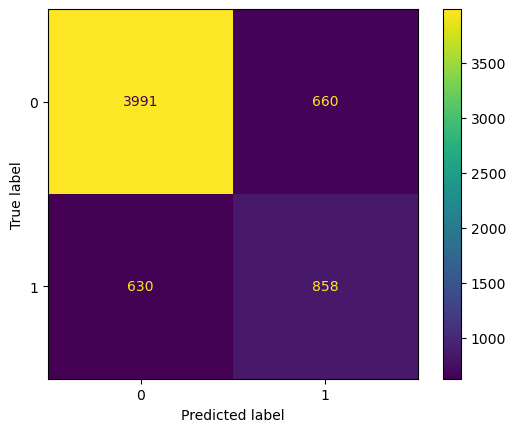

In [182]:
ConfusionMatrixDisplay.from_estimator(
    dtree_model, X_test_scaled, y_test,
    display_labels=["0", "1"])
plt.show()